# Module 5 Project: Are you at risk for type II diabetes?

## Part I: Data Cleaning and Feature Engineering

### Import libraries

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import data_importer as di
import feature_engineering as fe
import data_cleaning as dc
from import_info import import_info

import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from yellowbrick.classifier import ConfusionMatrix

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/SoniaDimithe/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Combine datasets

In [2]:
nhanes = di.data_complier(import_info)

In [3]:
nhanes.head()

,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,INDHHIN2,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BMXBMI,LBDINSI,LBXGLU,DBQ700,PAQ650,PAQ665,PAD680
SEQN,,,,,,,,,,,,,,,,,,
83732.0,1.0,62.0,3.0,5.0,10.0,128.0,70.0,124.0,64.0,116.0,62.0,27.8,NaN,NaN,3.0,2.0,1.0,480.0
83733.0,1.0,53.0,3.0,3.0,4.0,146.0,88.0,140.0,88.0,134.0,82.0,30.8,103.56,101.0,1.0,2.0,2.0,300.0
83734.0,1.0,78.0,3.0,3.0,5.0,138.0,46.0,132.0,44.0,136.0,46.0,28.8,70.62,84.0,4.0,2.0,2.0,480.0
83735.0,2.0,56.0,3.0,5.0,10.0,132.0,72.0,134.0,68.0,136.0,70.0,42.4,NaN,NaN,4.0,2.0,2.0,480.0
83736.0,2.0,42.0,4.0,4.0,7.0,100.0,70.0,114.0,54.0,98.0,56.0,20.3,32.52,84.0,5.0,2.0,2.0,540.0


In [4]:
nhanes.shape

(9971, 18)

### Get the mean for systolic and diastolic blood pressure, which had been measured three times each

In [5]:
nhanes = fe.average_blood_pressure(nhanes)

### Create new binary variable INDHHIN2_new to replace the problematic coding of original INDHHIN2. 
- 1:  income below 20K per year 
- 2:  income above 20K per year 

In [6]:
nhanes = fe.new_indhhin2(nhanes)

### Clean the dataset by:
- only consider adults >= 20 years old
- removes 'non-response' or 'refuse to response' values
- removes missing values

In [7]:
nhanes = dc.data_full_cleaner(nhanes)

4252 observations removed because age of participant is twenty or less.
5719 observations remaining.
56 observations removed because data was coded as respondent 'refused to answer' or 'don't know'.
5663 observations remaining.
3606 observations removed because data was missing.
2057 observations remaining.


### Create binary variables and dummie variables

In [8]:
nhanes = fe.create_binaries(nhanes)

In [9]:
nhanes = fe.create_dummies(nhanes)

### Assign target variable into three classes

- 0:  A fasting blood glucose level less than 100 mg/dL (5.6 mmol/L) is normal. 
- 1:  A fasting blood glucose level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes.
- 2:  If a fasting blood glucose level is 126 mg/dL (7 mmol/L) is considered as diabetes.

In [10]:
nhanes = fe.fasting_glucose_categories(nhanes)

In [11]:
nhanes.head()

,RIAGENDR,RIDAGEYR,BMXBMI,LBDINSI,PAQ650,PAQ665,PAD680,BPXDI,BPXSY,INDHHIN2_new,RIDRETH3_2.0,RIDRETH3_3.0,RIDRETH3_4.0,RIDRETH3_6.0,RIDRETH3_7.0,DMDEDUC2_2.0,DMDEDUC2_3.0,DMDEDUC2_4.0,DMDEDUC2_5.0,DBQ700_2.0,DBQ700_3.0,DBQ700_4.0,DBQ700_5.0,GLU
SEQN,,,,,,,,,,,,,,,,,,,,,,,,
83733.0,0,53.0,30.8,103.56,1,1,300.0,86.00,140.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
83734.0,0,78.0,28.8,70.62,1,1,480.0,45.33,135.33,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0.0
83736.0,1,42.0,20.3,32.52,1,1,540.0,60.00,104.00,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0.0
83737.0,1,72.0,28.6,49.44,1,1,10.0,58.67,119.33,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1.0
83741.0,0,22.0,28.0,68.34,0,1,540.0,72.67,111.33,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0.0


In [12]:
nhanes.shape

(2057, 24)

In [13]:
nhanes.to_csv(r'data/nhanes_csv.csv')

In [14]:
df = nhanes.copy()

In [15]:
df.columns

Index(['RIAGENDR', 'RIDAGEYR', 'BMXBMI', 'LBDINSI', 'PAQ650', 'PAQ665', 'PAD680', 'BPXDI', 'BPXSY', 'INDHHIN2_new', 'RIDRETH3_2.0', 'RIDRETH3_3.0', 'RIDRETH3_4.0', 'RIDRETH3_6.0', 'RIDRETH3_7.0', 'DMDEDUC2_2.0', 'DMDEDUC2_3.0', 'DMDEDUC2_4.0', 'DMDEDUC2_5.0', 'DBQ700_2.0', 'DBQ700_3.0', 'DBQ700_4.0', 'DBQ700_5.0', 'GLU'], dtype='object')

In [16]:
df.columns = ['gender', 'age', 'bmi', 'insulin', 'vigorous_PA', 'moderate_PA', 'sedentary_PA_min',\
             'diastolic_bp', 'systolic_bp', 'income', 'ethnicity_other_hispanic', 'ethnicity_white',\
             'ethnicity_black', 'ethnicity_asian', 'ethnicity_multirace', 'education_9-11th_grade',\
              'education_highschool_graduate', 'education_some_college', 'educatiom_college_grad',\
              'diet_very_good', 'diet_good', 'diet_fair', 'diet_poor', 'glucose_level']

In [17]:
df.to_csv(r"data/nhanes_data.csv")

## Part II: Data Analysis

# Logistic Regression

### Step 1: Train-test split

In [18]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1645, 23)
(1645,)
(412, 23)
(412,)


### Step 2: Examine multicollinearity

After examining multicollinearity, only blood insulin level and BMI are moderately correlated (around 0.5). Since both of these two features are crucial to bood glucose leve, neither one is removed. 

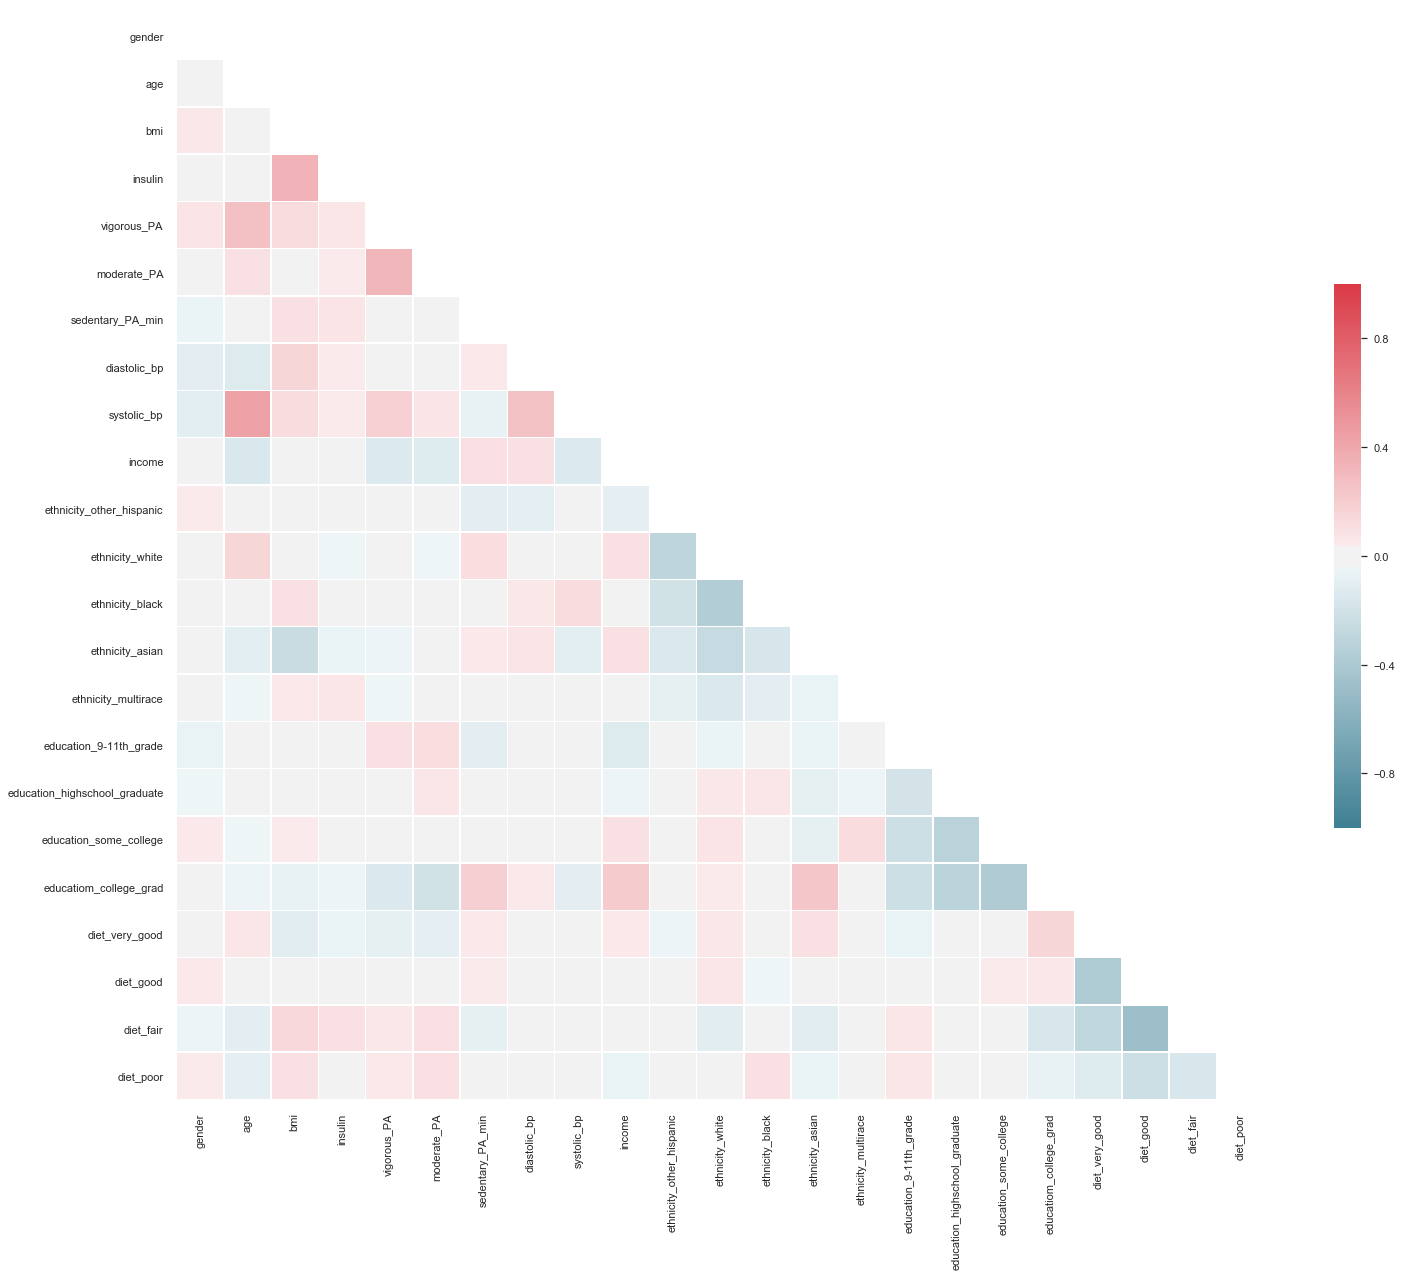

In [21]:
sns.set(style="white")

corr = X_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

We did not get rid of any of the variables due to multicollinearity, because the highest absolute correlation value was between 0.5 and 0.6

### Step 3: Create baseline model and confusion matrix

In [22]:
dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print("\n", 'Dummy F1-Score: ', f1_score(y_test, dummy_pred, average = 'weighted'), "\n",\
      'Dummy Accuracy Score: ', accuracy_score(y_test, dummy_pred), "\n",\
      'Dummy Precision Score: ', precision_score(y_test, dummy_pred, average = 'weighted'), "\n",\
      'Dummy Recall Score: ', recall_score(y_test, dummy_pred, average = 'weighted'))


 Dummy F1-Score:  0.2833930336969383 
 Dummy Accuracy Score:  0.4538834951456311 
 Dummy Precision Score:  0.20601022716561412 
 Dummy Recall Score:  0.4538834951456311


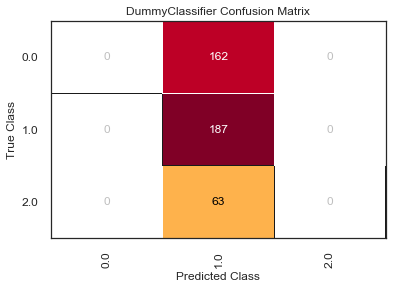

In [23]:
cm = ConfusionMatrix(dummy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

### Step 4: Gid search and find the best model

##### penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
- Used to specify the norm used in the penalization.
- The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver.
- If ‘none’ (not supported by the liblinear solver), no regularization is applied.

##### solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
- Algorithm to use in the optimization problem.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
- ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
- ‘liblinear’ and ‘saga’ also handle L1 penalty
- ‘saga’ also supports ‘elasticnet’ penalty
- ‘liblinear’ does not handle no penalty

### Check classes distribution

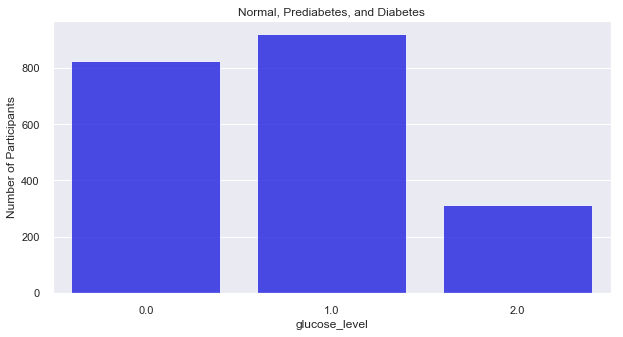

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(y, alpha=.80, color='blue')
plt.title('Normal, Prediabetes, and Diabetes')
plt.ylabel('Number of Participants')
plt.show()

### Making classes balanced did not help bring up the accuracy and F1-score

In [25]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [26]:
st_scale = StandardScaler()
st_scale.fit(X_train)
st_scale.fit(X_test)
X_train = st_scale.transform(X_train)
X_test = st_scale.transform(X_test)

In [27]:
logistic = linear_model.LogisticRegression()

In [28]:
random_state = [1,6,14,88,23]

penalty = ['l2']

C = np.logspace(0, 4, 10)

solver = ['lbfgs', 'sag', 'saga']

multi_class = ['ovr', 'multinomial']

hyperparameters = dict(random_state=random_state, C=C, penalty=penalty, solver=solver, multi_class=multi_class)

In [29]:
clf = GridSearchCV(logistic, hyperparameters, cv=5, return_train_score=True)

In [31]:
best_model = clf.fit(X_train, y_train)

In [32]:
best_model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_hat_test_best_model = best_model.predict(X_test)

print("\n", 'Logistic Regression F1-Score: ', f1_score(y_test, y_hat_test_best_model, average = 'weighted'), "\n",\
      'Logistic Regression Accuracy Score: ', accuracy_score(y_test, y_hat_test_best_model), "\n",\
      'Logistic Regression Precision Score: ', precision_score(y_test, y_hat_test_best_model, average = 'weighted'), "\n",\
      'Logistic Regression Recall Score: ', recall_score(y_test, y_hat_test_best_model, average = 'weighted'))


 Logistic Regression F1-Score:  0.5614282995885382 
 Logistic Regression Accuracy Score:  0.5825242718446602 
 Logistic Regression Precision Score:  0.6012034592350438 
 Logistic Regression Recall Score:  0.5825242718446602


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

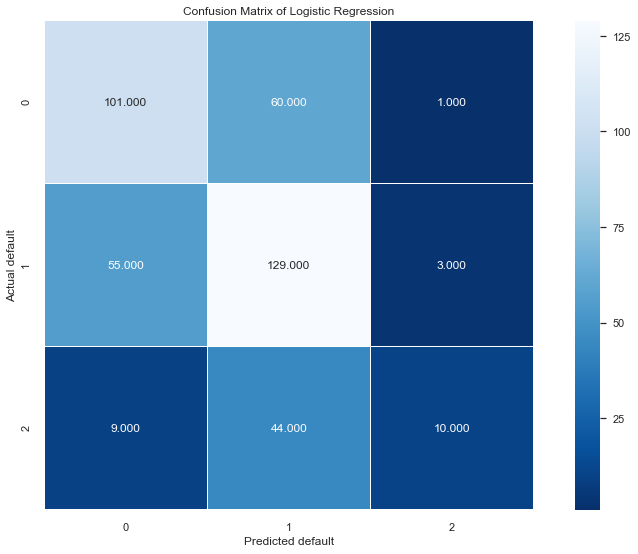

In [34]:
cm = confusion_matrix(y_test,y_hat_test_best_model)
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual default');
plt.xlabel('Predicted default');
plt.title("Confusion Matrix of Logistic Regression")

# Decision Tree

In [35]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
training_data = pd.concat([X_train, y_train], axis=1)

### Grid Search to find the best model

In [36]:
random_state=[1]

criterion = ['gini','entropy']

max_depth = np.linspace(1, 32, 32, endpoint=True)

min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)

min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)

max_features = list(range(1,training_data.shape[1]))

hyperparameters = dict(random_state=random_state, criterion=criterion, min_samples_leaf=min_samples_leaf,\
                       max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features)

In [37]:
# tree = GridSearchCV(DecisionTreeClassifier(), hyperparameters)
# tree.fit(X_train, y_train)

In [38]:
# tree_preds = tree.predict(X_test)
# print("\n", 'Decision Tree F1-Score: ', f1_score(y_test, tree_preds, average = 'weighted'), "\n",\
#       'Decision Tree Accuracy Score: ', accuracy_score(y_test, tree_preds), "\n",\
#       'Decision Tree Precision Score: ', precision_score(y_test, tree_preds, average = 'weighted'), "\n",\
#       'Decision Tree Recall Score: ', recall_score(y_test, tree_preds, average = 'weighted'))

In [39]:
clf = DecisionTreeClassifier(random_state=23,criterion='gini',max_depth=3,\
                             min_samples_leaf=0.1, max_features=12, min_samples_split=0.2)
clf.fit(X_train, y_train)

tree_preds = clf.predict(X_test)
print("\n", 'Decision Tree F1-Score: ', f1_score(y_test, tree_preds, average = 'weighted'), "\n",\
      'Decision Tree Accuracy Score: ', accuracy_score(y_test, tree_preds), "\n",\
      'Decision Tree Precision Score: ', precision_score(y_test, tree_preds, average = 'weighted'), "\n",\
      'Decision Tree Recall Score: ', recall_score(y_test, tree_preds, average = 'weighted'))


 Decision Tree F1-Score:  0.5619061281777646 
 Decision Tree Accuracy Score:  0.5703883495145631 
 Decision Tree Precision Score:  0.5643437663872991 
 Decision Tree Recall Score:  0.5703883495145631


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

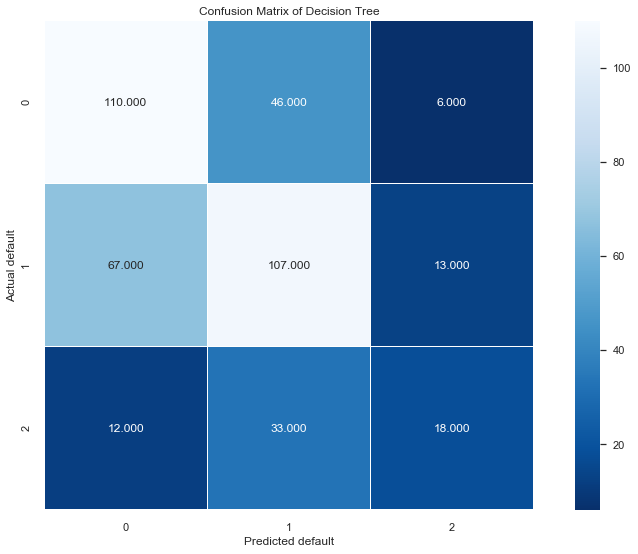

In [40]:
cm = confusion_matrix(y_test,tree_preds)
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual default');
plt.xlabel('Predicted default');
plt.title("Confusion Matrix of Decision Tree")

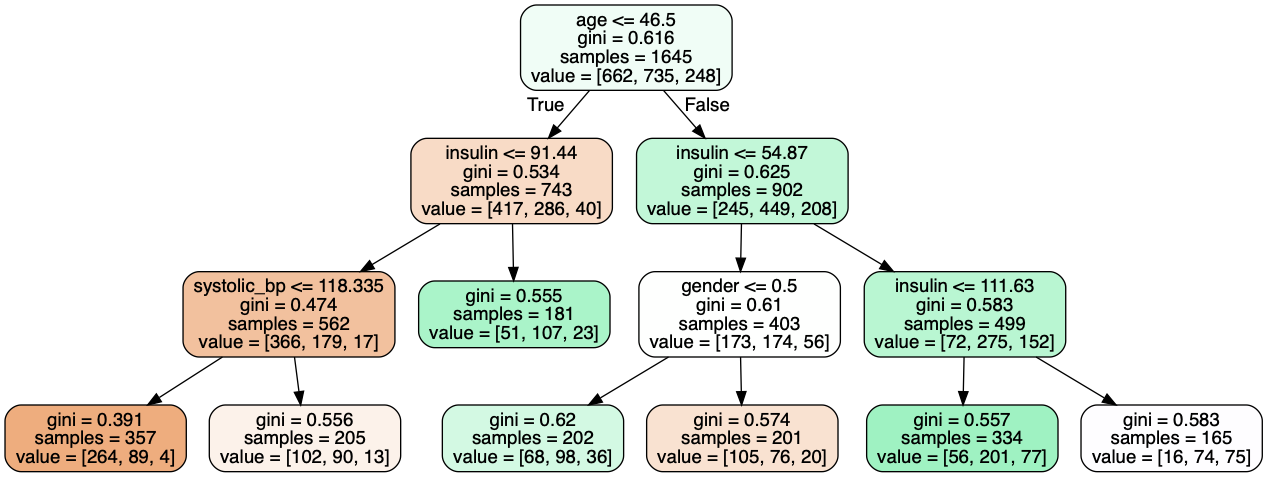

In [41]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
dt_features = pd.Series(clf.feature_importances_, index = X_train.columns)

In [43]:
dt_features

gender                           0.038567
age                              0.382318
bmi                              0.000000
insulin                          0.486165
vigorous_PA                      0.000000
moderate_PA                      0.000000
sedentary_PA_min                 0.000000
diastolic_bp                     0.000000
systolic_bp                      0.092950
income                           0.000000
ethnicity_other_hispanic         0.000000
ethnicity_white                  0.000000
ethnicity_black                  0.000000
ethnicity_asian                  0.000000
ethnicity_multirace              0.000000
education_9-11th_grade           0.000000
education_highschool_graduate    0.000000
education_some_college           0.000000
educatiom_college_grad           0.000000
diet_very_good                   0.000000
diet_good                        0.000000
diet_fair                        0.000000
diet_poor                        0.000000
dtype: float64

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from scipy import interp


X = df.drop('glucose_level', axis=1)
y = df.glucose_level

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=8)

classifier = DecisionTreeClassifier()

y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#ROC curve for a specific class here for the class 2
print(roc_auc[0])
print(roc_auc[1])
print(roc_auc[2])

0.6238584158963856
0.5625558995528036
0.5522698435076836


In [45]:
roc_auc_logreg = [['normal',0.62],['prediabetes',0.57],['diabetes',0.55]]
dt_df = pd.DataFrame(roc_auc_logreg, columns = ['class','roc_auc_score'])

In [46]:
dt_df

,class,roc_auc_score
0,normal,0.62
1,prediabetes,0.57
2,diabetes,0.55


# KNN

In [47]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
training_data = pd.concat([X_train, y_train], axis=1)

## Grid search to find the best model

In [48]:
n_neighbors = [3,5,7,9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1, 2,3,4,5]
params = dict(n_neighbors=n_neighbors, weights=weights,\
              algorithm=algorithm, p=p)

In [49]:
neighbor = GridSearchCV(KNeighborsClassifier(), params)
neighbor.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
neighbor_preds = neighbor.predict(X_test)
print("\n", 'KNN F1-Score: ', f1_score(y_test, y_hat_test_best_model, average = 'weighted'), "\n",\
      'KNN Accuracy Score: ', accuracy_score(y_test, y_hat_test_best_model), "\n",\
      'KNN Precision Score: ', precision_score(y_test, y_hat_test_best_model, average = 'weighted'), "\n",\
      'KNN Recall Score: ', recall_score(y_test, y_hat_test_best_model, average = 'weighted'))


 KNN F1-Score:  0.5614282995885382 
 KNN Accuracy Score:  0.5825242718446602 
 KNN Precision Score:  0.6012034592350438 
 KNN Recall Score:  0.5825242718446602


In [51]:
neighbor.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'Confusion Matrix of KNN')

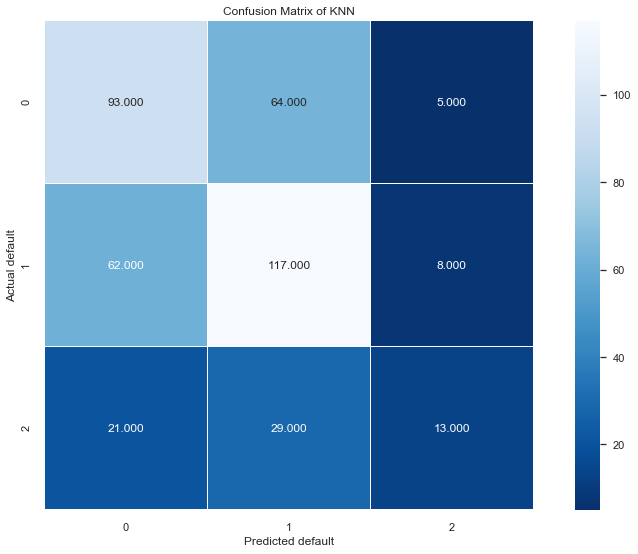

In [52]:
cm = confusion_matrix(y_test,neighbor_preds)
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual default');
plt.xlabel('Predicted default');
plt.title("Confusion Matrix of KNN")

# SVM, Best Model, and Grid Search

In [53]:
from sklearn import svm

In [54]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
training_data = pd.concat([X_train, y_train], axis=1)

In [55]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [56]:
base_svm_model =  svm.SVC(random_state = 8, gamma='scale')

In [57]:
grid_param = { 
    'kernel':['linear', 'rbf', 'poly','sigmoid'],
    'shrinking': [True, False],
    'decision_function_shape':['ovo','ovr'],
    'C':[0.1, 1.0, 10.0]
    }
svm_grid = GridSearchCV(estimator = base_svm_model,
                     param_grid = grid_param,
                     scoring = 'accuracy',
                     cv = 20,
                     n_jobs = -1)
svm_grid.fit(X_train, y_train)

/Users/SoniaDimithe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [58]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
    accuracy = accuracy_score(test_labels, predictions)#100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))  
    return accuracy


In [59]:
# Base svm model
base_svm_model.fit(X_train, y_train)
base_accuracy = evaluate(base_svm_model, X_test, y_test)

# Best svm model
best_svm_model = svm_grid.best_estimator_
best_svm_fit = best_svm_model.fit(X_train, y_train)
grid_accuracy = evaluate(best_svm_model, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.4587 degrees.
Accuracy = 0.57%.
Model Performance
Average Error: 0.4515 degrees.
Accuracy = 0.57%.
Improvement of 0.00%.


In [60]:
y_hat_train = best_svm_fit.predict(X_train)
y_hat_test = best_svm_fit.predict(X_test)


 ----- ------ ------- ----- 
 | Support Vector Machine | 
 ----- ------ ------- ----- 
 Training F1-Score:  0.5583770435039341 , Testing F1-Score:  0.5246353576450664 
 Training Accuracy:  0.5987841945288754 , Testing Accuracy:  0.5655339805825242 
 Training Precision Score:  0.6303591084093212 , Testing Precision Score:  0.6372461983924694 
 Training Recall Score:  0.5987841945288754 , Testing Recall Score:  0.5655339805825242


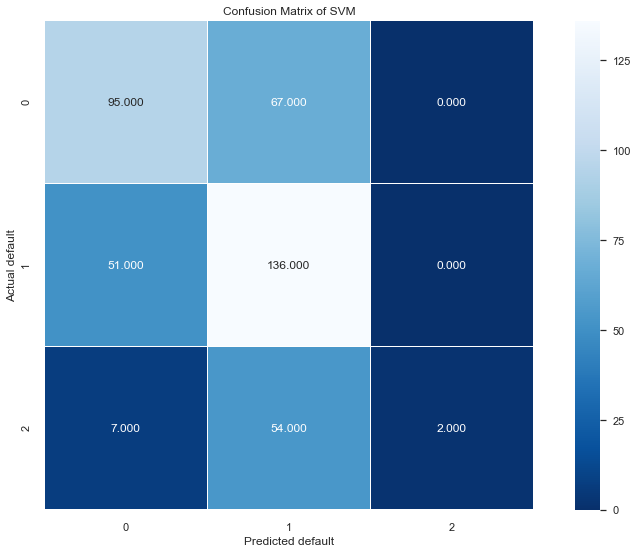

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_hat_test)
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual default');
plt.xlabel('Predicted default');
plt.title("Confusion Matrix of SVM")

#Metrics
f1_score_train = f1_score(y_train, y_hat_train, average = 'weighted')
f1_score_test = f1_score(y_test, y_hat_test, average = 'weighted')

accuracy_score_train = accuracy_score(y_train, y_hat_train)
accuracy_score_test = accuracy_score(y_test, y_hat_test)

precision_score_train = precision_score(y_train, y_hat_train, average = 'weighted')
precision_score_test = precision_score(y_test, y_hat_test, average = 'weighted')

recall_score_train = recall_score(y_train, y_hat_train, average = 'weighted')
recall_score_test = recall_score(y_test, y_hat_test, average = 'weighted')


print("\n", 
      '----- ------ ------- -----', "\n",\
      '| Support Vector Machine |', "\n",\
      '----- ------ ------- -----', "\n",\
      'Training F1-Score: ', f1_score_train, ', Testing F1-Score: ', f1_score_test, "\n",\
      'Training Accuracy: ', accuracy_score_train, ', Testing Accuracy: ', accuracy_score_test, "\n",\
      'Training Precision Score: ', precision_score_train, ', Testing Precision Score: ', precision_score_test, "\n",\
      'Training Recall Score: ',recall_score_train, ', Testing Recall Score: ', recall_score_test)


# Random Forest, Random Search, and Best Model

In [62]:
X = df.drop('glucose_level', axis = 1)
y = df.glucose_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
training_data = pd.concat([X_train, y_train], axis=1)

In [63]:
base_rf_model = RandomForestClassifier(random_state=8, n_jobs= -1)

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Criterion
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # random states
# random_state = [int(x) for x in np.linspace(10, 110, num = 11)]
# random_state .append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Warm Start
warm_start= [True,False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion,
               'warm_start': warm_start,
               'bootstrap': bootstrap }



In [65]:
rf_random = RandomizedSearchCV(estimator = base_rf_model, param_distributions = random_grid, cv = 3, random_state=8, n_jobs= -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [66]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [67]:
# base_rf_model = RandomForestClassifier(random_state = 8)
base_rf_model.fit(X_train, y_train)
base_accuracy = evaluate(base_rf_model, X_test, y_test)

print('  ')
best_rf_model = rf_random.best_estimator_
best_rf_model_fit = best_rf_model.fit(X_train, y_train)
random_accuracy = evaluate(best_rf_model, X_test, y_test)
print('  ')
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.5073 degrees.
Accuracy = 0.54%.
  
Model Performance
Average Error: 0.4733 degrees.
Accuracy = 0.56%.
  
Improvement of 4.05%.


In [68]:
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(best_rf_model_fit.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# feature_importances

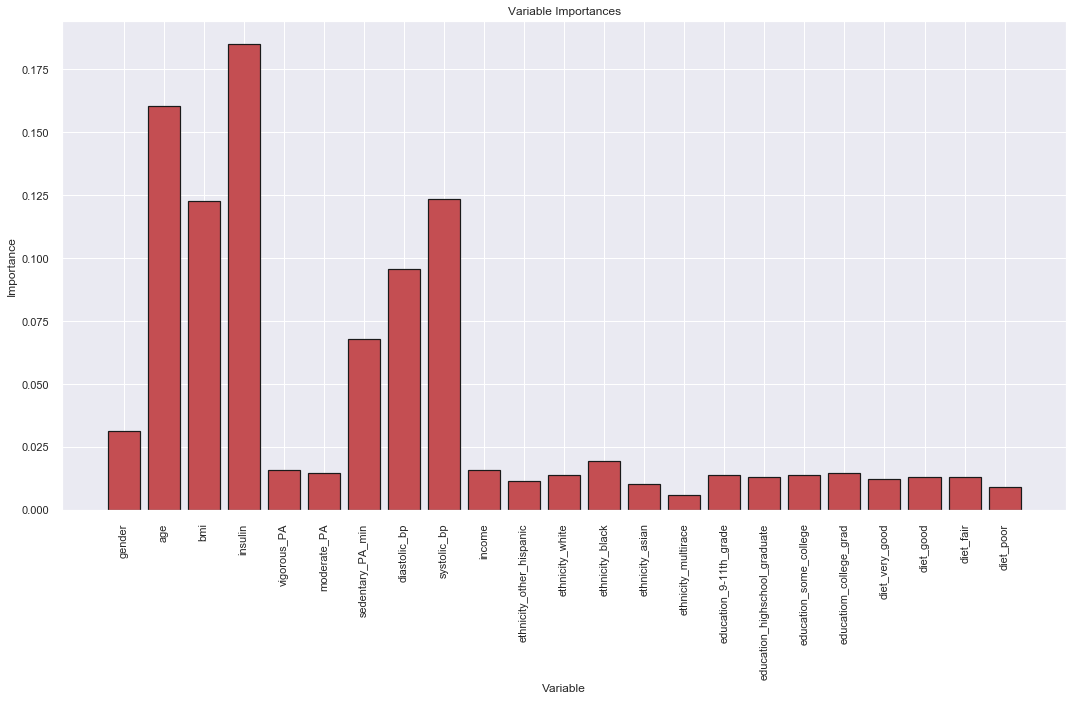

In [69]:
# list of x locations for plotting
fig1 = plt.figure(figsize=(18, 9))
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
fig1.savefig('importantVariable.png')

a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 95% of total importance accounted for.


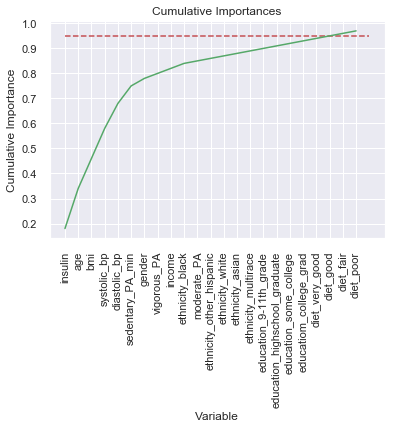

In [70]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
print('a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 95% of total importance accounted for.')

In [71]:
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)
print('- Find number of features for cumulative importance of 95%')

Number of features for 95% importance: 21
- Find number of features for cumulative importance of 95%


In [72]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:21]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

In [73]:
# Create training and testing sets with only the important features
important_train_features = ((X_train).to_numpy())[:, important_indices]
X_train_best = important_train_features.copy()
important_test_features = ((X_test).to_numpy())[:, important_indices]
X_test_best = important_test_features.copy()
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1645, 21)
Important test features shape: (412, 21)


In [74]:
best_rf_model = rf_random.best_estimator_
best_rf_model_fit = best_rf_model.fit(X_train_best, y_train)

In [75]:
y_hat_test = best_rf_model_fit.predict(X_test_best)

In [76]:
rf_preds = best_rf_model_fit.predict(X_test_best)
print("\n", 'RF F1-Score: ', f1_score(y_test, rf_preds, average = 'weighted'), "\n",\
      'RF Accuracy Score: ', accuracy_score(y_test, rf_preds), "\n",\
      'RF Precision Score: ', precision_score(y_test, rf_preds, average = 'weighted'), "\n",\
      'RF Recall Score: ', recall_score(y_test, rf_preds, average = 'weighted'))


 RF F1-Score:  0.5465278453212296 
 RF Accuracy Score:  0.5752427184466019 
 RF Precision Score:  0.5942213580089497 
 RF Recall Score:  0.5752427184466019


Text(0.5, 1.0, 'Confusion Matrix of RF')

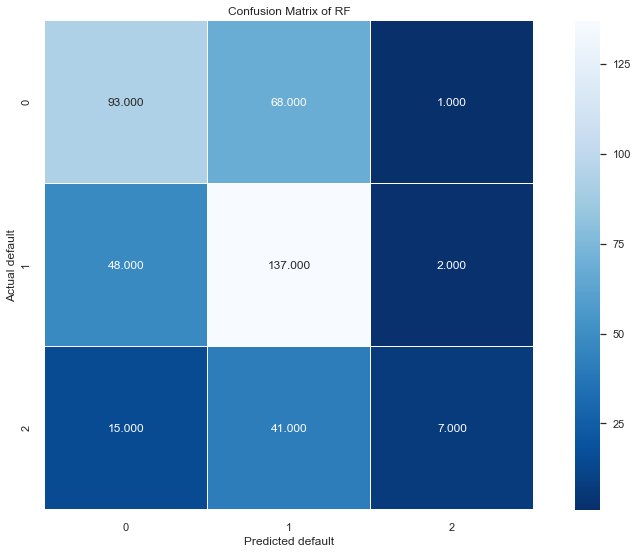

In [81]:
cm = confusion_matrix(y_test,rf_preds)
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual default');
plt.xlabel('Predicted default');
plt.title("Confusion Matrix of RF")

In [77]:
random_accuracy = evaluate(best_rf_model, X_test_best, y_test)
print(' ')

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.4636 degrees.
Accuracy = 0.58%.
 
Improvement of 6.76%.


In [78]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = best_rf_model.estimators_[3]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = important_feature_names, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [79]:
from PIL import Image
myImage = Image.open("tree.png");

# import Image

# image = Image.open('image.jpg')
# image.show()

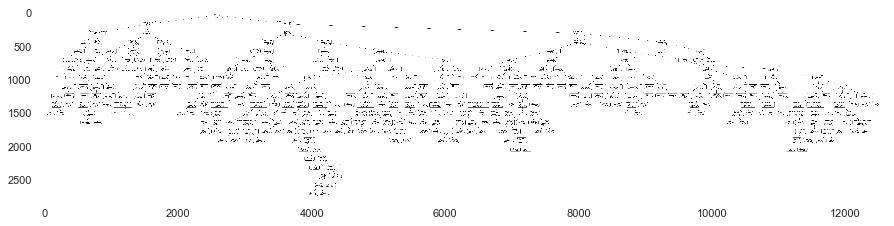

In [80]:
plt.figure(figsize=(15,9))
plt.imshow(myImage) 
plt.show()  